# AI Project
Dataset: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u/about_data

We have selected LAW_CAT_CD (Law Category Code) as target column since it clasifies the severity of crimes in 3 categories:
1. Felony (F)
2. Misdemeanor (M)
3. Violation (V)



# K-Nearest-Neighbour

KNN for LAW_CAT_CD

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = knn.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0     0     0     0     1     0]
 [    0     0    13     0    94     0]
 [    0     0  9605     0  6896     4]
 [    0     0     4     0    29     0]
 [    0     0  2909     0 18942    18]
 [    0     0    26     0   273    54]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      (null)       0.00      0.00      0.00         1
           9       0.00      0.00      0.00       107
           F       0.76      0.58      0.66     16505
           I       0.00      0.00      0.00        33
           M       0.72      0.87      0.79     21869
           V       0.71      0.15      0.25       353

    accuracy                           0.74     38868
   macro avg       0.37      0.27      0.28     38868
weighted avg       0.74      0.74      0.73     38868


Accuracy Score: 0.7358495420397242


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN for , 'PERP_SEX'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_RACE','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_SEX']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = knn.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[  796  6216]
 [ 1771 30307]]

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.11      0.17      7012
           1       0.83      0.94      0.88     32078

    accuracy                           0.80     39090
   macro avg       0.57      0.53      0.52     39090
weighted avg       0.74      0.80      0.75     39090


Accuracy Score: 0.7956766436428754


AGE_GROUP


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['AGE_GROUP']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = knn.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 1266  4876   423     7    56]
 [ 3112 17647  1767    35   163]
 [  991  5523  1021    17    43]
 [   86   520    78     7     3]
 [  256   988   108     3    94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.19      0.21      6628
           1       0.60      0.78      0.68     22724
           2       0.30      0.13      0.19      7595
           3       0.10      0.01      0.02       694
           4       0.26      0.06      0.10      1449

    accuracy                           0.51     39090
   macro avg       0.30      0.24      0.24     39090
weighted avg       0.45      0.51      0.47     39090


Accuracy Score: 0.5125351752366334


PERP_RACE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_RACE']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = knn.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

print(df)

Confusion Matrix:
 [[    1     7    66    12     0     8    28]
 [    1   272  1274    73     0   155   434]
 [    9   669 13218   862     2   764  2702]
 [    1   139  2560   448     1   133   716]
 [    1     8   104     7     2     9    24]
 [    2   222  2455   142     2   560   543]
 [   10   548  6382   600     6   477  2431]]

Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.01      0.01       122
           1       0.15      0.12      0.13      2209
           2       0.51      0.73      0.60     18226
           3       0.21      0.11      0.15      3998
           4       0.15      0.01      0.02       155
           5       0.27      0.14      0.19      3926
           6       0.35      0.23      0.28     10454

    accuracy                           0.43     39090
   macro avg       0.24      0.19      0.20     39090
weighted avg       0.39      0.43      0.39     39090


Accuracy Score: 0.4331542594013814
       


# Decision trees

LAW_CAT_CD

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (optional for Decision Trees, but included in case you want to experiment) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Initialize and Train the Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Use X_train directly (no scaling needed for Decision Trees)

# --- Make Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test,y_pred))


Confusion Matrix:
 [[    0     0     0     0     1     0]
 [    0     0    12     0    95     0]
 [    0     1  9688     0  6808     8]
 [    0     0     4     0    29     0]
 [    0     5  2882    11 18948    23]
 [    0     0    14     0   282    57]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      (null)       0.00      0.00      0.00         1
           9       0.00      0.00      0.00       107
           F       0.77      0.59      0.67     16505
           I       0.00      0.00      0.00        33
           M       0.72      0.87      0.79     21869
           V       0.65      0.16      0.26       353

    accuracy                           0.74     38868
   macro avg       0.36      0.27      0.29     38868
weighted avg       0.74      0.74      0.73     38868


Accuracy Score: 0.7382165277348977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Age group

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['AGE_GROUP']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- Initialize and Train the Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Use X_train directly (no scaling needed for Decision Trees)

# --- Make Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test,y_pred))


Confusion Matrix:
 [[  767  5503   283    13    62]
 [ 1421 19924  1197    54   128]
 [  469  6142   925    19    40]
 [   41   563    75    14     1]
 [  169  1104    71     2   103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.12      0.16      6628
           1       0.60      0.88      0.71     22724
           2       0.36      0.12      0.18      7595
           3       0.14      0.02      0.04       694
           4       0.31      0.07      0.12      1449

    accuracy                           0.56     39090
   macro avg       0.34      0.24      0.24     39090
weighted avg       0.48      0.56      0.48     39090


Accuracy Score: 0.55597339473011


PERP_RACE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_RACE']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Initialize and Train the Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Use X_train directly (no scaling needed for Decision Trees)

# --- Make Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test,y_pred))


Confusion Matrix:
 [[    0     6    75     5     0     6    30]
 [    0   180  1417    27     2    88   495]
 [   10   334 14683   419     4   437  2339]
 [    1    54  2946   304     1    54   638]
 [    0     0   113     5     2     6    29]
 [    0   128  2749    72     2   451   524]
 [    6   229  7079   293     8   280  2559]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.19      0.08      0.11      2209
           2       0.51      0.81      0.62     18226
           3       0.27      0.08      0.12      3998
           4       0.11      0.01      0.02       155
           5       0.34      0.11      0.17      3926
           6       0.39      0.24      0.30     10454

    accuracy                           0.47     39090
   macro avg       0.26      0.19      0.19     39090
weighted avg       0.41      0.47      0.41     39090


Accuracy Score: 0.4650550012790995


Prep sex

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_RACE','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_SEX']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Initialize and Train the Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=35)
clf.fit(X_train, y_train)  # Use X_train directly (no scaling needed for Decision Trees)

# --- Make Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test,y_pred))



Confusion Matrix:
 [[ 1002  6010]
 [ 2176 29902]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.14      0.20      7012
           1       0.83      0.93      0.88     32078

    accuracy                           0.79     39090
   macro avg       0.57      0.54      0.54     39090
weighted avg       0.74      0.79      0.76     39090


Accuracy Score: 0.7905858275773855


# Naive Bayes

LAW_CAT_CD

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN, but not necessary for Naive Bayes) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train the Naive Bayes Model ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)


# --- Make Predictions ---
y_pred = nb_model.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[    1     0     0     0     0     0]
 [   90     8     0     0     0     9]
 [ 4859   210  8447   230  1921   838]
 [   28     1     0     0     0     4]
 [12514   668  1440   247  3840  3160]
 [  268     0     0     0     0    85]]

Classification Report:
               precision    recall  f1-score   support

      (null)       0.00      1.00      0.00         1
           9       0.01      0.07      0.02       107
           F       0.85      0.51      0.64     16505
           I       0.00      0.00      0.00        33
           M       0.67      0.18      0.28     21869
           V       0.02      0.24      0.04       353

    accuracy                           0.32     38868
   macro avg       0.26      0.33      0.16     38868
weighted avg       0.74      0.32      0.43     38868


Accuracy Score: 0.31853967273849954


AGE_GROUP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Features and Target
features = ['ARREST_BORO', 'LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['AGE_GROUP']  # Target

# Encode categorical features
encoder = LabelEncoder()
for col in ['ARREST_BORO', 'LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'OFNS_GROUPED']:
    X[col] = encoder.fit_transform(X[col])

# Encode target variable if necessary
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

<ipython-input-45-284bef715677>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-45-284bef715677>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-45-284bef715677>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Confusion Matrix:
 [[    0  6597     0     0     0]
 [    0 22572     0     0     0]
 [    0  7559     0     0     0]
 [    0   691     0     0     0]
 [    0  1449     0     0     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6597
           1       0.58      1.00      0.73     22572
           2       0.00      0.00      0.00      7559
           3       0.00      0.00      0.00       691
           4       0.00      0.00      0.00      1449

    accuracy                           0.58     38868
   macro avg       0.12      0.20      0.15     38868
weighted avg       0.34      0.58      0.43     38868


Accuracy Score: 0.580734794689719


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PERP_SEX

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Feature Selection ---
features = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_SEX']  # Target: M (Male), F (Female)

# --- Encode Categorical Variables ---
encoder = LabelEncoder()

# Encode target variable (PERP_SEX) to numeric
y = encoder.fit_transform(y)

# Encode categorical features in X
for col in ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_RACE', 'OFNS_GROUPED']:
    X[col] = encoder.fit_transform(X[col])

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN, but not necessary for Naive Bayes) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train the Naive Bayes Model ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# --- Make Predictions ---
y_pred = nb_model.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


<ipython-input-47-d57f28d95a59>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-47-d57f28d95a59>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-47-d57f28d95a59>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Confusion Matrix:
 [[    0  6992]
 [    0 31876]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6992
           1       0.82      1.00      0.90     31876

    accuracy                           0.82     38868
   macro avg       0.41      0.50      0.45     38868
weighted avg       0.67      0.82      0.74     38868


Accuracy Score: 0.8201090871668211


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PERP_RACE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Feature Selection ---
features = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_RACE']  # Target: M (Male), F (Female)

# --- Encode Categorical Variables ---
encoder = LabelEncoder()

# Encode target variable (PERP_SEX) to numeric
y = encoder.fit_transform(y)

# Encode categorical features in X
for col in ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX', 'OFNS_GROUPED']:
    X[col] = encoder.fit_transform(X[col])

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN, but not necessary for Naive Bayes) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train the Naive Bayes Model ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# --- Make Predictions ---
y_pred = nb_model.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


<ipython-input-48-841051419720>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-48-841051419720>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-48-841051419720>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Confusion Matrix:
 [[    0     0   116     0     0     0     5]
 [    0     0  2118     0     0     7    67]
 [    0     0 17565     0     0    65   507]
 [    0     0  3900     0     0     6    61]
 [    0     0   148     0     0     0     5]
 [    0     0  3550     0     0    71   282]
 [    0     0 10085     0     0    35   275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.00      0.00      0.00      2192
           2       0.47      0.97      0.63     18137
           3       0.00      0.00      0.00      3967
           4       0.00      0.00      0.00       153
           5       0.39      0.02      0.03      3903
           6       0.23      0.03      0.05     10395

    accuracy                           0.46     38868
   macro avg       0.15      0.14      0.10     38868
weighted avg       0.32      0.46      0.31     38868


Accuracy Score: 0.4608160955027272


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Neural Networks

LAW_CAT_CD

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6157 - loss: 0.7646 - val_accuracy: 0.7416 - val_loss: 0.5783
Epoch 2/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7386 - loss: 0.5816 - val_accuracy: 0.7428 - val_loss: 0.5664
Epoch 3/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7397 - loss: 0.5753 - val_accuracy: 0.7449 - val_loss: 0.5639
Epoch 4/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7394 - loss: 0.5701 - val_accuracy: 0.7427 - val_loss: 0.5622
Epoch 5/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7394 - loss: 0.5691 - val_accuracy: 0.7492 - val_loss: 0.5603
Epoch 6/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7404 - loss: 0.5662 - val_accuracy: 0.7481 - val_loss: 0.5595
Epoch 7/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7389 - loss: 0.5674 - val_accuracy: 0.7454 - val_loss: 0.5569
Epoch 8/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7418 - loss

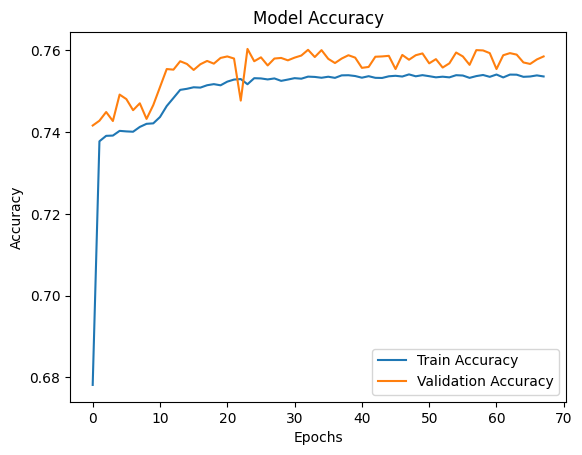

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

data=pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
data['PERP_RACE'].unique()

# Drop unnecessary columns
data = data.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
data = data.dropna(subset=['LAW_CAT_CD'])
data = data.dropna(subset=['ARREST_BORO'])
data = data.dropna(subset=['AGE_GROUP'])
data = data.dropna(subset=['PERP_SEX'])
data = data.dropna(subset=['PERP_RACE'])


# Convert 'ARREST_DATE' to datetime
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])
data['ARREST_DAY'] = data['ARREST_DATE'].dt.day_name()
data['ARREST_MONTH'] = data['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
data['OFNS_GROUPED'] = data['OFNS_DESC'].map(offense_mapping).fillna('Other')
data = data.dropna(subset=['ARREST_DAY'])
data = data.dropna(subset=['OFNS_GROUPED'])

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data['LAW_CAT_CD']=encoder.fit_transform(data['LAW_CAT_CD'])



# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = data[features]
y = data['LAW_CAT_CD']  # Target: Felony, Misdemeanor, Violation


# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(20, activation='relu', input_shape=(7,)),
    Dense(10, activation='relu'),
    Dense(6, activation='softmax',)  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop after 10 epochs without improvement
    restore_best_weights=True  # Restore the best weights from the epoch with the lowest val_loss
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

AGE_GROUP

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4373/4373 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5546 - loss: 1.2086 - val_accuracy: 0.5740 - val_loss: 1.1259
Epoch 2/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5806 - loss: 1.1172 - val_accuracy: 0.5740 - val_loss: 1.1214
Epoch 3/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5804 - loss: 1.1139 - val_accuracy: 0.5739 - val_loss: 1.1203
Epoch 4/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5822 - loss: 1.1101 - val_accuracy: 0.5739 - val_loss: 1.1200
Epoch 5/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5826 - loss: 1.1097 - val_accuracy: 0.5740 - val_loss: 1.1192
Epoch 6/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5821 - loss: 1.1085 - val_accuracy: 0.5738 - val_loss: 1.1193
Epoch 7/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5833 - loss: 1.1061 - val_accuracy: 0.5740 - val_loss: 1.1205
Epoch 8/100
4373/4373 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5822 - loss: 1.1077 - va

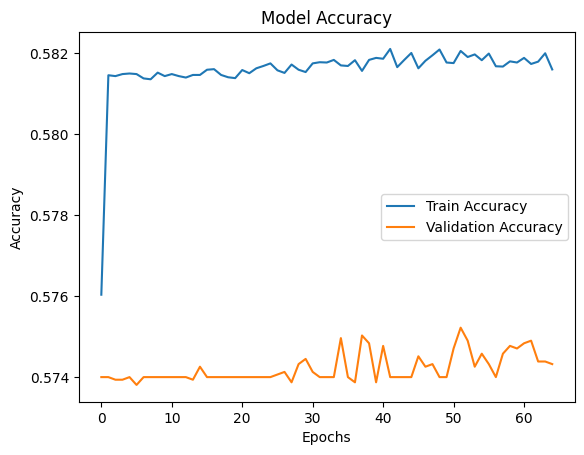

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

data=pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
data['PERP_RACE'].unique()

# Drop unnecessary columns
data = data.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
data = data.dropna(subset=['LAW_CAT_CD'])
data = data.dropna(subset=['ARREST_BORO'])
data = data.dropna(subset=['AGE_GROUP'])
data = data.dropna(subset=['PERP_SEX'])
data = data.dropna(subset=['PERP_RACE'])


# Convert 'ARREST_DATE' to datetime
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])
data['ARREST_DAY'] = data['ARREST_DATE'].dt.day_name()
data['ARREST_MONTH'] = data['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
data['OFNS_GROUPED'] = data['OFNS_DESC'].map(offense_mapping).fillna('Other')
data = data.dropna(subset=['ARREST_DAY'])
data = data.dropna(subset=['OFNS_GROUPED'])

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data['LAW_CAT_CD']=encoder.fit_transform(data['LAW_CAT_CD'])

# --- Feature Selection ---
features = ['ARREST_BORO', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED', 'LAW_CAT_CD']
X = data[features]
y = data['AGE_GROUP']
y=encoder.fit_transform(y)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(19, activation='relu', input_shape=(7,)),
    Dense(10, activation='relu'),
    Dense(5, activation='softmax',)  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop after 10 epochs without improvement
    restore_best_weights=True  # Restore the best weights from the epoch with the lowest val_loss
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

PERP_SEX

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

data=pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
data['PERP_RACE'].unique()


# Drop unnecessary columns
data = data.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
data = data.dropna(subset=['LAW_CAT_CD'])
data = data.dropna(subset=['ARREST_BORO'])
data = data.dropna(subset=['AGE_GROUP'])
data = data.dropna(subset=['PERP_SEX'])
data = data.dropna(subset=['PERP_RACE'])


# Convert 'ARREST_DATE' to datetime
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])
data['ARREST_DAY'] = data['ARREST_DATE'].dt.day_name()
data['ARREST_MONTH'] = data['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
data['OFNS_GROUPED'] = data['OFNS_DESC'].map(offense_mapping).fillna('Other')
data = data.dropna(subset=['ARREST_DAY'])
data = data.dropna(subset=['OFNS_GROUPED'])

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data['LAW_CAT_CD']=encoder.fit_transform(data['LAW_CAT_CD'])


# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED', 'LAW_CAT_CD']
X = data[features]
y = data['PERP_SEX']
y=encoder.fit_transform(y)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(14, activation='relu', input_shape=(7,)),
    Dense(7, activation='relu'),
    Dense(2, activation='softmax',)  # Output layer with 3 classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop after 10 epochs without improvement
    restore_best_weights=True  # Restore the best weights from the epoch with the lowest val_loss
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3826/3826 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7976 - loss: 0.5068 - val_accuracy: 0.8173 - val_loss: 0.4740
Epoch 2/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8200 - loss: 0.4701 - val_accuracy: 0.8173 - val_loss: 0.4720
Epoch 3/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8210 - loss: 0.4672 - val_accuracy: 0.8173 - val_loss: 0.4707
Epoch 4/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8202 - loss: 0.4665 - val_accuracy: 0.8173 - val_loss: 0.4688
Epoch 5/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8209 - loss: 0.4645 - val_accuracy: 0.8173 - val_loss: 0.4690
Epoch 6/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8215 - loss: 0.4628 - val_accuracy: 0.8173 - val_loss: 0.4675
Epoch 7/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8228 - loss: 0.4601 - val_accuracy: 0.8173 - val_loss: 0.4675
Epoch 8/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8206 - loss: 0.4640 

Test Accuracy: 0.82


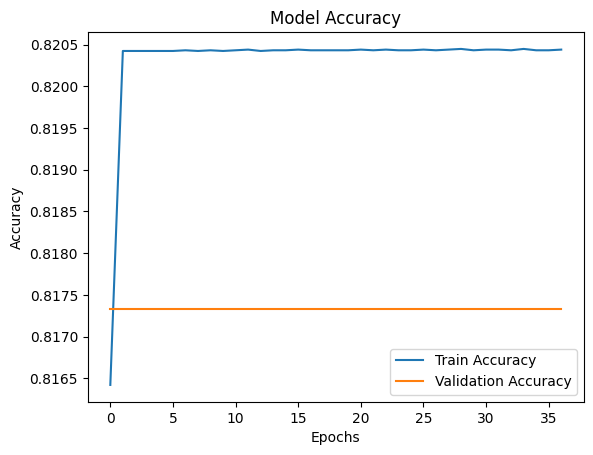

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

PERP_RACE

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3826/3826 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4136 - loss: 1.6627 - val_accuracy: 0.4643 - val_loss: 1.3415
Epoch 2/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4652 - loss: 1.3394 - val_accuracy: 0.4642 - val_loss: 1.3333
Epoch 3/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.4696 - loss: 1.3270 - val_accuracy: 0.4657 - val_loss: 1.3305
Epoch 4/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.4717 - loss: 1.3241 - val_accuracy: 0.4683 - val_loss: 1.3251
Epoch 5/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4744 - loss: 1.3189 - val_accuracy: 0.4697 - val_loss: 1.3218
Epoch 6/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.4758 - loss: 1.3190 - val_accuracy: 0.4708 - val_loss: 1.3265
Epoch 7/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4721 - loss: 1.3217 - val_accuracy: 0.4706 - val_loss: 1.3240
Epoch 8/100
3826/3826 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.4768 - loss: 1.3147

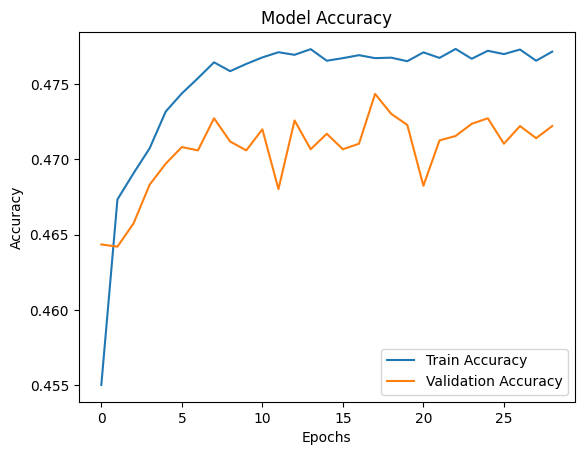

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

data=pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
data['PERP_RACE'].unique()


# Drop unnecessary columns
data = data.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
data = data.dropna(subset=['LAW_CAT_CD'])
data = data.dropna(subset=['ARREST_BORO'])
data = data.dropna(subset=['AGE_GROUP'])
data = data.dropna(subset=['PERP_SEX'])
data = data.dropna(subset=['PERP_RACE'])


# Convert 'ARREST_DATE' to datetime
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])
data['ARREST_DAY'] = data['ARREST_DATE'].dt.day_name()
data['ARREST_MONTH'] = data['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
data['OFNS_GROUPED'] = data['OFNS_DESC'].map(offense_mapping).fillna('Other')
data = data.dropna(subset=['ARREST_DAY'])
data = data.dropna(subset=['OFNS_GROUPED'])

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data['LAW_CAT_CD']=encoder.fit_transform(data['LAW_CAT_CD'])

# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED', 'LAW_CAT_CD']
X = data[features]
y = data['PERP_RACE']
y=encoder.fit_transform(y)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(21, activation='relu', input_shape=(7,)),
    Dense(14, activation='relu'),
    Dense(7, activation='softmax',)  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop after 10 epochs without improvement
    restore_best_weights=True  # Restore the best weights from the epoch with the lowest val_loss
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Support Vector Machines

LAW_CAT_CD

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[    0     0     0     0     1     0]
 [    0     0     4     0   103     0]
 [    0     0  6444     0 10061     0]
 [    0     0     4     0    29     0]
 [    0     0  1042     0 20827     0]
 [    0     0    19     0   334     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      (null)       0.00      0.00      0.00         1
           9       0.00      0.00      0.00       107
           F       0.86      0.39      0.54     16505
           I       0.00      0.00      0.00        33
           M       0.66      0.95      0.78     21869
           V       0.00      0.00      0.00       353

    accuracy                           0.70     38868
   macro avg       0.25      0.22      0.22     38868
weighted avg       0.74      0.70      0.67     38868


Accuracy Score: 0.7016311618812391


PREP_SEX

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_RACE','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_SEX']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0  7012]
 [    0 32078]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7012
           1       0.82      1.00      0.90     32078

    accuracy                           0.82     39090
   macro avg       0.41      0.50      0.45     39090
weighted avg       0.67      0.82      0.74     39090


Accuracy Score: 0.820619084164748


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 AGE_GROUP

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['AGE_GROUP']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0  6628     0     0     0]
 [    0 22724     0     0     0]
 [    0  7595     0     0     0]
 [    0   694     0     0     0]
 [    0  1449     0     0     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6628
           1       0.58      1.00      0.74     22724
           2       0.00      0.00      0.00      7595
           3       0.00      0.00      0.00       694
           4       0.00      0.00      0.00      1449

    accuracy                           0.58     39090
   macro avg       0.12      0.20      0.15     39090
weighted avg       0.34      0.58      0.43     39090


Accuracy Score: 0.5813251470964441


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PREP_RACE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'])

# Drop missing values in the target column
df = df.dropna(subset=['AGE_GROUP'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# --- Encode Categorical Variables ---
categorical_cols = ['ARREST_BORO', 'AGE_GROUP','LAW_CAT_CD', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# --- Feature Selection ---
features = ['ARREST_BORO','LAW_CAT_CD', 'PERP_SEX','AGE_GROUP', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_RACE']  # Target: Felony, Misdemeanor, Violation

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling (Important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# --- Evaluation ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[    0     0   121     0     0     0     1]
 [    0     0  2205     0     0     0     4]
 [    0     0 18162     0     0     0    64]
 [    0     0  3994     0     0     0     4]
 [    0     0   154     0     0     0     1]
 [    0     0  3902     0     0     0    24]
 [    0     0 10417     0     0     0    37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.00      0.00      0.00      2209
           2       0.47      1.00      0.64     18226
           3       0.00      0.00      0.00      3998
           4       0.00      0.00      0.00       155
           5       0.00      0.00      0.00      3926
           6       0.27      0.00      0.01     10454

    accuracy                           0.47     39090
   macro avg       0.11      0.14      0.09     39090
weighted avg       0.29      0.47      0.30     39090


Accuracy Score: 0.4655666410846764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic regression

LAW_CAT_CD

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], errors='ignore')

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# Encode Categorical Variables
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and Target for LAW_CAT_CD
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']

# Encode the target variable (LAW_CAT_CD)
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0     0     0     0     1     0]
 [    0     0     4     0   103     0]
 [    0     0  6497     0 10008     0]
 [    0     0     4     0    29     0]
 [    0     0  1044     0 20825     0]
 [    0     0    19     0   334     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       107
           2       0.86      0.39      0.54     16505
           3       0.00      0.00      0.00        33
           4       0.67      0.95      0.78     21869
           5       0.00      0.00      0.00       353

    accuracy                           0.70     38868
   macro avg       0.25      0.22      0.22     38868
weighted avg       0.74      0.70      0.67     38868


Accuracy Score: 0.7029432952557374


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PREP_SEX

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files


df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], errors='ignore')

# Drop missing values in the target column
df = df.dropna(subset=['PERP_SEX'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# Encode Categorical Variables
categorical_cols = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and Target for PERP_SEX
features = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_SEX']

# Encode the target variable (PERP_SEX)
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0  7012]
 [    0 32078]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7012
           1       0.82      1.00      0.90     32078

    accuracy                           0.82     39090
   macro avg       0.41      0.50      0.45     39090
weighted avg       0.67      0.82      0.74     39090


Accuracy Score: 0.820619084164748


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AGE_GROUP

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files


df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], errors='ignore')

# Drop missing values in the target column
df = df.dropna(subset=['LAW_CAT_CD'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# Encode Categorical Variables
categorical_cols = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and Target for LAW_CAT_CD
features = ['ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['LAW_CAT_CD']

# Encode the target variable (LAW_CAT_CD)
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0     0     0     0     1     0]
 [    0     0     4     0   103     0]
 [    0     0  6497     0 10008     0]
 [    0     0     4     0    29     0]
 [    0     0  1044     0 20825     0]
 [    0     0    19     0   334     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00       107
           2       0.86      0.39      0.54     16505
           3       0.00      0.00      0.00        33
           4       0.67      0.95      0.78     21869
           5       0.00      0.00      0.00       353

    accuracy                           0.70     38868
   macro avg       0.25      0.22      0.22     38868
weighted avg       0.74      0.70      0.67     38868


Accuracy Score: 0.7029432952557374


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PREP_RACE

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files


df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')


# Drop unnecessary columns
df = df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], errors='ignore')

# Drop missing values in the target column
df = df.dropna(subset=['PERP_RACE'])

# Convert 'ARREST_DATE' to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')
df['ARREST_DAY'] = df['ARREST_DATE'].dt.day_name()
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month

# Simplify 'OFNS_DESC' into groups
offense_mapping = {
    'PETIT LARCENY': 'Larceny',
    'GRAND LARCENY': 'Larceny',
    'ROBBERY': 'Theft/Robbery',
    'BURGLARY': 'Theft/Robbery',
    'FELONY ASSAULT': 'Violent Crime',
    'MISDEMEANOR ASSAULT': 'Violent Crime',
    'DANGEROUS DRUGS': 'Drug-Related',
    'CRIMINAL MISCHIEF': 'Property Crime',
    'FORGERY': 'Fraud',
    'FRAUDS': 'Fraud',
}
df['OFNS_GROUPED'] = df['OFNS_DESC'].map(offense_mapping).fillna('Other')

# Encode Categorical Variables
categorical_cols = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX', 'ARREST_DAY', 'OFNS_GROUPED']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and Target for PERP_RACE
features = ['ARREST_BORO', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX', 'ARREST_DAY', 'ARREST_MONTH', 'OFNS_GROUPED']
X = df[features]
y = df['PERP_RACE']

# Encode the target variable (PERP_RACE)
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[    0     0   121     0     0     0     1]
 [    0     0  2206     0     0     0     3]
 [    0     0 18171     0     0     0    55]
 [    0     0  3994     0     0     0     4]
 [    0     0   154     0     0     0     1]
 [    0     0  3898     0     0     8    20]
 [    0     0 10423     0     0     0    31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.00      0.00      0.00      2209
           2       0.47      1.00      0.64     18226
           3       0.00      0.00      0.00      3998
           4       0.00      0.00      0.00       155
           5       1.00      0.00      0.00      3926
           6       0.27      0.00      0.01     10454

    accuracy                           0.47     39090
   macro avg       0.25      0.14      0.09     39090
weighted avg       0.39      0.47      0.30     39090


Accuracy Score: 0.4658480429777437


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
